In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_jpg = glob("train/*.jpg")
test_jpg = glob("test/*.jpg")

# About the data

In [4]:
train_df.shape

(9912, 14)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [9]:
test_df.shape

(8, 13)

In [10]:
type(train_jpg)

list

In [11]:
len(train_jpg)

9912

In [13]:
train_jpg[0:5]

['train/2ba808b11e2e7302c65c1142fae20328.jpg',
 'train/492babff6c77d1f1be8e266cc7c89ab4.jpg',
 'train/80fefdaf088a47eeea3d67d30ecf5f2c.jpg',
 'train/df68a50f7971ab56ca45e6d4378a9e8f.jpg',
 'train/420dd08c4151dc5eb4465633416d56bd.jpg']

# About the train data

In [14]:
train_df.head()
# the 0/1 shows no/yes of each feature

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [22]:
train_df.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [19]:
train_df[['Pawpularity']].describe()

,Pawpularity
count,9912.000000
mean,38.039044
std,20.591990
min,1.000000
25%,25.000000
50%,33.000000
75%,46.000000
max,100.000000


#### distribution

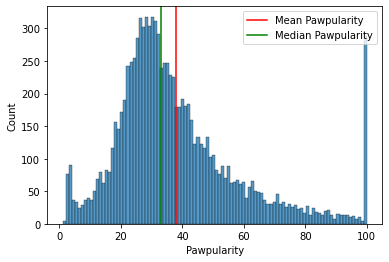

In [18]:
sns.histplot(data=train_df, x='Pawpularity', bins=100)
plt.axvline(train_df['Pawpularity'].mean(), c='red', ls='-',label='Mean Pawpularity')
plt.axvline(train_df['Pawpularity'].median(),c='green',ls='-',label='Median Pawpularity')
plt.legend()
plt.show()
# little peak at the beginning and almost 300 100score. There's trend in the data

#### I wanted to plot this graph with each feature and see how they relate to the overall data. Found this code below and I think it's so efficient! 

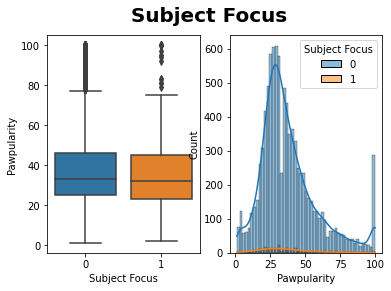

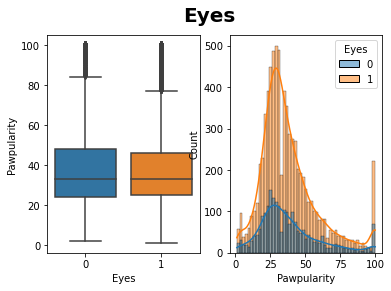

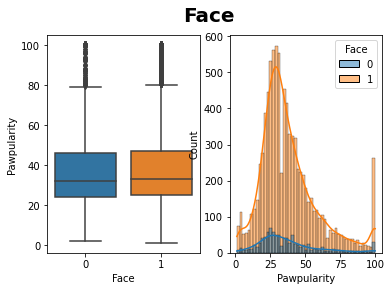

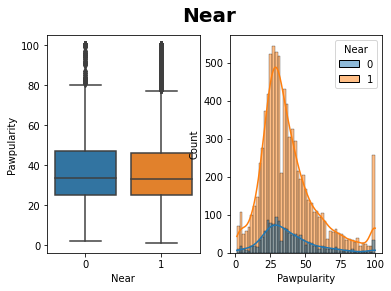

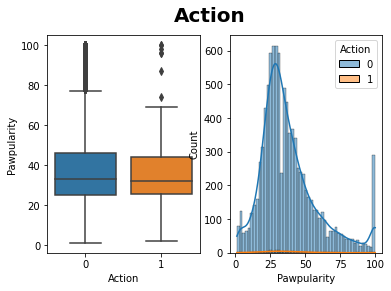

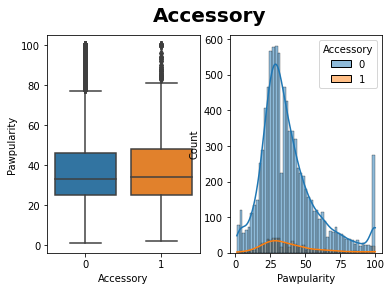

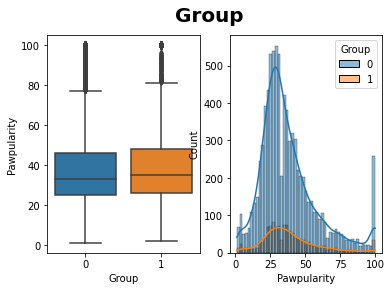

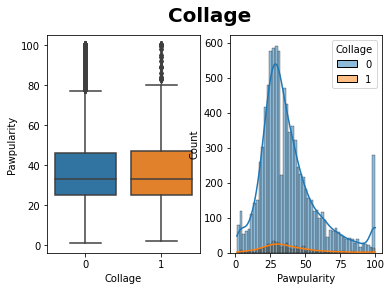

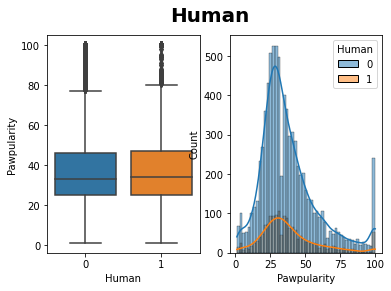

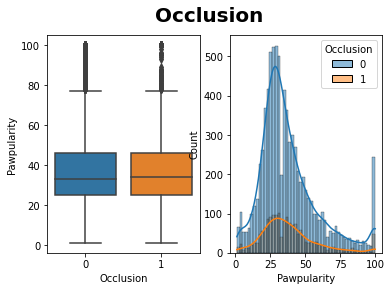

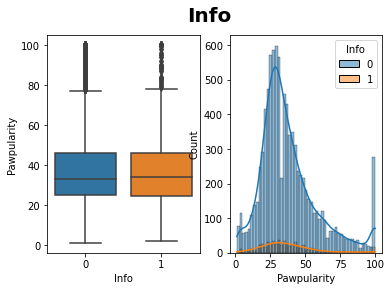

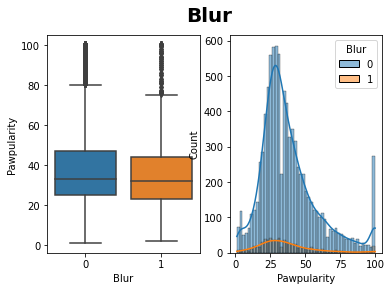

In [21]:
feature_variables = train_df.columns.values.tolist()

#for each of the feature variables, doesn't include Id and Pawpularity by using [1:-1]
#show a boxplot and distribution plot against pawpularity

for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)
    sns.boxplot(data=train_df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(train_df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    plt.suptitle(variable, fontsize=20, fontweight='bold')

# Image data

In [23]:
print(train_jpg[0])

train/2ba808b11e2e7302c65c1142fae20328.jpg


In [25]:
image_path = train_jpg[0]
image_array = plt.imread(image_path) 
print(image_array.shape)

(854, 1280, 3)


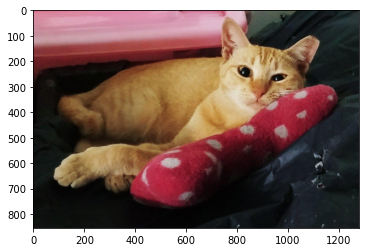

In [29]:
plt.imshow(image_array)

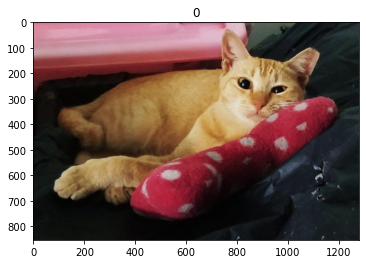

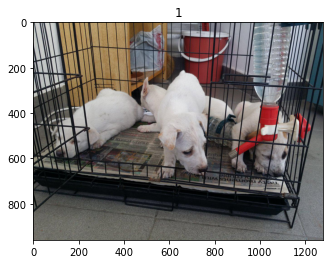

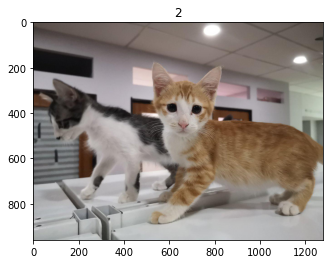

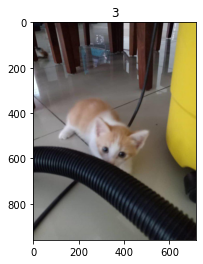

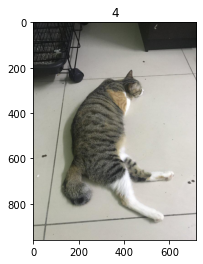

In [36]:
for x in range(5):
    image_path = train_jpg[x]
    image_array = plt.imread(image_path) 
    plt.imshow(image_array)
    plt.title(x) 
    plt.show()

#### To show the pawpularity score of each picture

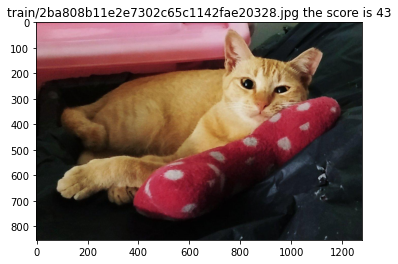

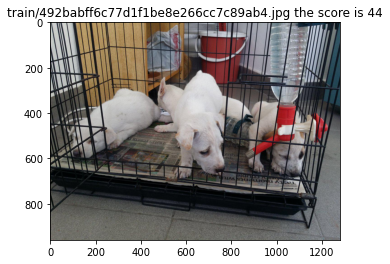

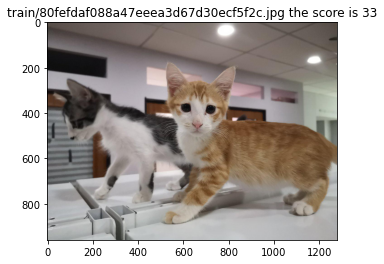

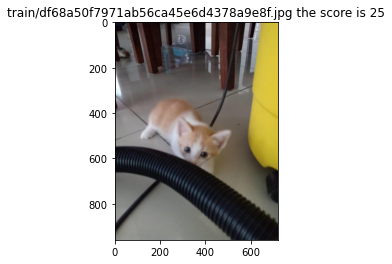

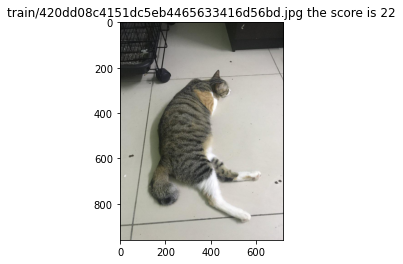

In [48]:
for x in range(5):
    image_path = train_jpg[x]
    
    # to get the matching score
    id_stem = Path(image_path).stem
    id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']
    pawpularity_match_id = id_stem_series.iloc[0]
    
    image_array = plt.imread(image_path) 
    plt.imshow(image_array)
    title = image_path + ' the score is ' +str(pawpularity_match_id)
    plt.title(title) 
    plt.show()

# Models

In my Machine Learning with R class I learned several models that are suitable for this case. Last week I just learned decision trees and found similar cases so I'll try use some models from that. There are many models in decision trees that I can use. I already replicate the course lab in R so I wish it can work out in Python.

This course also already covered ML and DL and I found plenty of code of this project in kaggle. They're enough for me to do simple modeling.

I'll try to cover all the models in decision trees but I'll do two simple ones this time: regression trees and classification trees.

Also this competetion only has five test data so it wouldn't look as good in the graphs. I'll just split train and test data test_size=0.2 myself.

The book also introduced bagging ,Random Forests and boosting. I read the scikit learn documentations and they looks a bit more complicated.

I also see many people use Naive Bayes classifier. If I have enough time or the decision tree doesn't work well I'll check that.

## Regression Trees

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [52]:
y = train_df['Pawpularity']

# exclude Id and Pawpualarirty for the feature variables
X = train_df.drop(['Id','Pawpularity'],axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [63]:
tree_reg = DecisionTreeRegressor(max_depth = 3, min_samples_split = 10)
tree_reg.fit(x_train, y_train)
tree_reg_pred = tree_reg.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, tree_reg_pred))

20.9694020743959

Not very good result

#### Visualize the tree

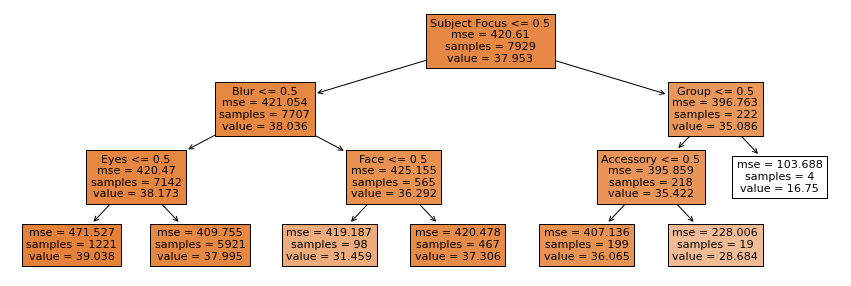

In [95]:
fig = plt.figure(figsize=(15,5))
plot = tree.plot_tree(tree_reg, feature_names=x_train.columns.values.tolist(), filled=True)

#### test the model

In [73]:
import matplotlib.patches as mpatches

In [89]:
def testthemodel(y_test,y_pred,title):
    if max(y_test) >= max(y_pred):
        model_range = int(max(y_test))
    else:
        model_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='green')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.ylabel('Pawpularity ')
    plt.legend(handles = [mpatches.Patch(color='red', label='prediction'),mpatches.Patch(color='g', label='test')])
    plt.show()
    return

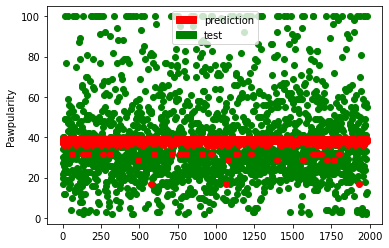

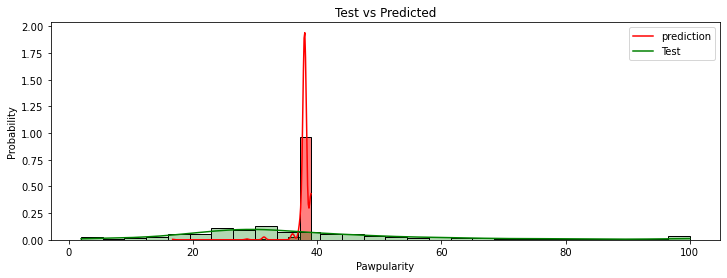

In [90]:
testthemodel(y_test, tree_reg_pred, "Test vs Predicted")
plt.figure(figsize=(12,4))
sns.histplot(tree_reg_pred,color='r',stat='probability', kde=True)
sns.histplot(y_test,color='g',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','Test'])
plt.title('Test vs Predicted')
plt.show()

## Classification Trees

In [93]:
tree_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)
tree_clf.fit(x_train, y_train)
tree_clf_pred = tree_clf.predict(x_test)

In [98]:
np.sqrt(mean_squared_error(y_test, tree_clf_pred))

22.872445529462627

Still look bad. Should keep trying other model for the final submission.

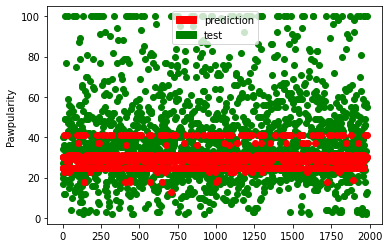

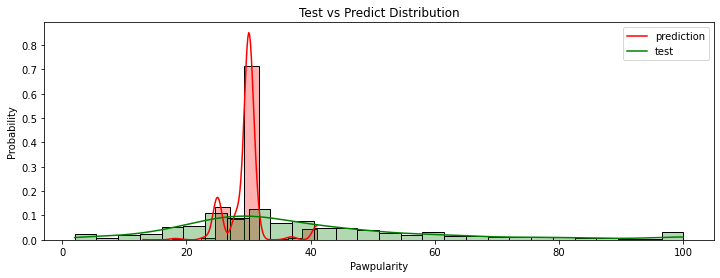

In [102]:
testthemodel(y_test, tree_clf_pred, "Test vs Predicted")

plt.figure(figsize=(12,4))
sns.histplot(tree_clf_pred,color='r',alpha=0.3,stat='probability', kde=True)
sns.histplot(y_test,color='g',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','test'])
plt.title('Test vs Predict Distribution')
plt.show()

Actually even if the sqrt is bigger for classification, the graph somehow looks a bit more accurate than regression.

For the final I'll try with bagging ,Random Forests and boosting. 

# Image models

I saw most people were using pytorch but it looks much more complicated. So I'll stay with the course and use tensorflow.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

ModuleNotFoundError: No module named 'tensorflow'